In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import os
import librosa
from pyspark.sql import *
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from scipy.io import wavfile
import scipy.stats as stats

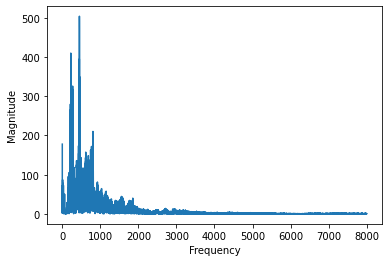

In [24]:
current_path = os.getcwd()
file_path = os.path.join(current_path,"CETUC", "Full", "F000-0000.wav")
audio_data, sample_rate = librosa.load(file_path, sr=16000)
step = int(sample_rate)
window_frequencies = []
top_freq = []

ft = np.fft.fft(audio_data)
magnitude = np.abs(ft)
frequency = np.linspace(0, sample_rate, len(magnitude))

plt.figure()
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(frequency)/2)])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [39]:
pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sample_rate)

print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
df = pd.read_csv('data/CETUC_MFCCs_data.csv')
df.head()

,FileName,MFCCs,Gender
0,F003-0616.wav,"[-451.6433, 120.348, -2.872225, 47.23785, -0.9...",0
1,F000-0823.wav,"[-309.70892, 96.34725, 10.261569, 34.542908, 6...",0
2,M009-0399.wav,"[-351.83615, 133.79265, 5.291138, 34.379498, -...",1
3,F033-0492.wav,"[-320.95276, 113.08917, 3.0742784, 52.79208, -...",0
4,M029-0430.wav,"[-369.07828, 117.03207, -19.2489, 41.3894, 14....",1


In [5]:
def get_features(frequencies):

  nobs, minmax, mean, variance, skew, kurtosis =  stats.describe(frequencies)
  median   = np.median(frequencies)
  mode     = stats.mode(frequencies).mode[0]
  std      = np.std(frequencies)
  low,peak = minmax
  q75,q25  = np.percentile(frequencies, [75 ,25])
  iqr      = q75 - q25
  return nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr

In [18]:
import json
json.loads(df['MFCCs'][0])

[-451.6433,
 120.348,
 -2.872225,
 47.23785,
 -0.977582,
 13.857303,
 -4.6302943,
 3.9663014,
 1.8603282,
 -1.2127173,
 1.9951056,
 -1.1936945,
 -4.1709275,
 -6.6610575,
 -0.2382222,
 -9.994849,
 0.035242043,
 -7.937756,
 -6.492932,
 -9.149591]

In [20]:
features_list = []
for i in range(len(df)):
    nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr = get_features(json.loads(df['MFCCs'][i]))
    data = [df['FileName'][i], nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr, df['Gender'][i]]
    features_list.append(data)
    print(f"\r{i/len(df)*100:.3f}% complete",end='')
df_final = pd.DataFrame(features_list, columns = ['FileName', 'nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 'Gender'])
df_final.to_csv('data/CETUC_MFCCs_statistics_data.csv', index=False)


99.999% complete